In [1]:
import networkx as nx
import networkit as nk

from pathlib import Path
# from panricci import RicciFlow
from panricci.ricci_flow.normalized_ricci_flow import NormalizedRicciFlow as RicciFlow

from panricci.distributions.variation_graph import DistributionNodes
# from panricci.distributions.sequence_graph import DistributionNodes
from panricci.utils import GFALoader

In [2]:
dirsave_graphs = "../output/normalized-ricci-flow-examples"

In [3]:
# DATA:
# path_gfa = "../data/test1.gfa"
# path_chkpt = "../output/test3/ricci-flow/test3-ricciflow-5.edgelist"

path_gfa = "/data/analysis-paper/experiments/mini-experiment-standard-not_alpha_consistent-not_fixblock/gfa-unchop/nodes/penalization0-min_len0-min_coverage0-alpha1/DQA1-3117.gfa"
path_chkpt = "../output/graph-alignment/ricci-flow/DQA1-3117-alpha1-ricciflow-5.edgelist"

# path_gfa = "/data/analysis-paper/experiments/mini-experiment-standard-not_alpha_consistent-not_fixblock/gfa-unchop/nodes/penalization0-min_len0-min_coverage0-alpha10/DQA1-3117.gfa"
# path_chkpt = "../output/graph-alignment/ricci-flow/DQA1-3117-alpha10-ricciflow-5.edgelist"

___
## Apply Ricci-Flow to a Variation Graph

In [4]:
# load graph
gfa_loader = GFALoader(undirected=False)
G = gfa_loader(path_gfa)

# compute distribution of nodes
distribution = DistributionNodes(G, alpha=0.5)

# Initialize ricci-flow
ricci_flow = RicciFlow(G, distribution, dirsave_graphs=dirsave_graphs, save_last=False, save_intermediate_graphs=True)
G_ricci = ricci_flow.run(iterations=15, name=Path(path_gfa).stem)

RicciFlow: 100%|██████████| 15/15 [00:10<00:00,  1.41it/s]


In [5]:
sum_w = 0
for u,v,data in G_ricci.edges(data=True,):
    sum_w += data["weight"]
sum_w

1069.3825278322777

____
## plot embeddings


<Axes: xlabel='from_source', ylabel='to_sink'>

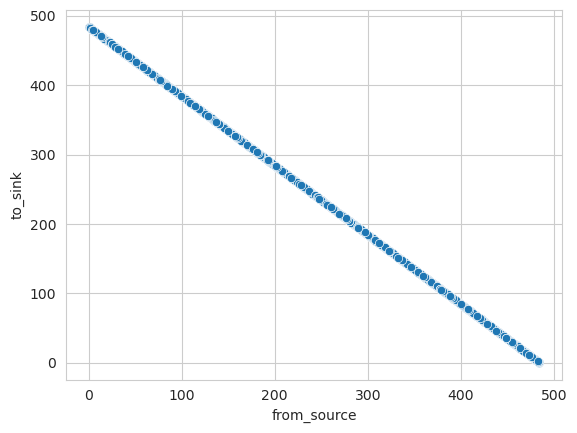

In [7]:
import seaborn as sns
import pandas as pd
from panricci.alignment.node_embeddings import NodeEmbeddings

compute_node_embeddings = NodeEmbeddings(
                                        ricci_embedding=True, # two coordinates considering shortest path [d(source, node),d(node,sink)]  
                                        seq_embedding=False   # 2 x 4^k coordinates, k-mer distributions for sequence spelled by the shortest paths between (source,node) and (node,sink) 
                                        )
node_emb = compute_node_embeddings(G_ricci)
coords = pd.DataFrame.from_dict(node_emb,orient="index",columns=["from_source","to_sink"])
sns.scatterplot(coords, x="from_source",y="to_sink",)

___

## Results

**Checkpoints can be loaded**

In [8]:
from sklearn.cluster import DBSCAN

In [9]:
G_chkpt = gfa_loader(path_gfa, path_chkpt)

<Axes: xlabel='to_sink', ylabel='from_source'>

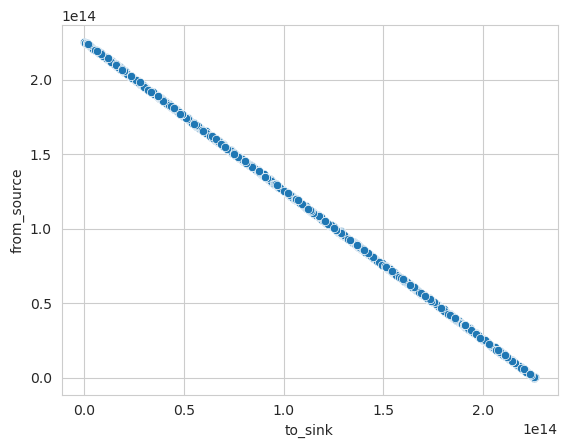

In [10]:
node_emb = compute_node_embeddings(G_chkpt)
coords = pd.DataFrame.from_dict(node_emb,orient="index",columns=["from_source","to_sink"])
sns.scatterplot(coords, x="to_sink",y="from_source",)

In [11]:
# Cluster coordinates using DBSCAN
X = coords
clustering = DBSCAN(eps=1.5, min_samples=5).fit(X)
coords["cluster"] = clustering.labels_
coords.reset_index(names="node", inplace=True)
# coords.to_csv("alpha50-labels.csv")

<Axes: xlabel='to_sink', ylabel='from_source'>

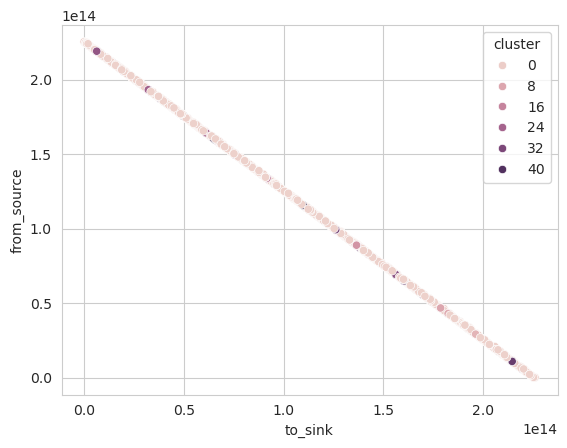

In [12]:
sns.scatterplot(coords, x="to_sink",y="from_source", hue="cluster")

In [13]:
coords.sort_values(by="cluster")

,node,from_source,to_sink,cluster
0,1,0.000000e+00,2.254880e+14,-1
1003,1004,2.373170e+13,2.017563e+14,-1
1002,1003,7.992324e+13,1.455648e+14,-1
1001,1002,7.177683e+13,1.537112e+14,-1
999,1000,1.837733e+14,4.171468e+13,-1
...,...,...,...,...
1357,1358,2.165013e+14,8.986683e+12,47
837,838,2.165013e+14,8.986683e+12,47
843,844,2.165013e+14,8.986683e+12,47
1027,1028,2.165013e+14,8.986683e+12,47
